In [6]:
# Importing neccessary liberaries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl
import warnings
warnings.filterwarnings('ignore')

### Fuzzy Inference System:
Fuzzy inference systems are used to map inputs or antecedents to outputs/Consequents using fuzzy logic. The decisions of mapping in this is based upon rules defined. These systems are used to design controller using fuzzy control if-then rules and use human expetise for designing that controller. These are robust , inexpensive and efficient control systems which emulates human deductive thinking. The different types of fuzzy systems are Mamdani, Sugemo and Tsukamoto.

Following are the teps needed ti design Fuzzy Controller Using Mamdani inference system.

1) Identification od Antecedents and Consequents : Here , there are 2 antecedents namely, 'Distance' and 'Angle' and 2 Consequents , namely , 'Speed' and 'Steering turn'.

2) Assigning descriptors to Fuzzy subsets.

3) Obtaining membership functions.

4) Making fuzzy rule base.

5) Evaluation of those rules and obtaining fuzzy output.

6) Defuzzification : Ti convert obtained fuzzy values into crisp values.

In the following,all of these steps will be explained in detail.

# Part 1)

### Defining Fuzzy quantities:
- Here, Distance and Angle is defined under Antecedent as 'D' and 'A', respectively , they are used as the bases , on which the decisions of Consequents or Speed and Steering_turn will be made.
- The Antecedents are the input or sensor variables in fuzzy control systems.
- The Antecedent Distance varies in range(0,10) with stepsize of 0.5 and has three states namely, 'Near' as 'N','Far' as 'F' and 'Very_far' as 'VF', where 0 is minimum distance and 10 is maximum distance, in given range.
- The Antecedent Angle varies in range(0,90) with stepsize of 1 and has three states namely, 'Small' as 'S','Medium' as 'M' and 'Large' and 'L', where 0 degree is the minimum angle and 90 degree is the maximum angle from the obstacle , in given range.
- The Consequents are the output or control variables in fuzzy control systems.
- The Consequent Speed varies in range(0,5) with stepsize of 0.2 and has four states namely, 'Slow' as 'SS','Medium' as 'MS','Fast' as 'FS' and 'Maximum' as 'MX', where 0 is the minimum speed and 5 is the maximum speed , in the given range.
- The Consequent Steering turn varies in range(0,90) with stepsize of 1 and has three states namely, 'Mild' as 'MST','Sharp' as 'SST' and 'Very_shape' as 'VST', where 0 degree is the minimum steering turn angle and 90 degree is the maximum steering turn angle, in the given range.

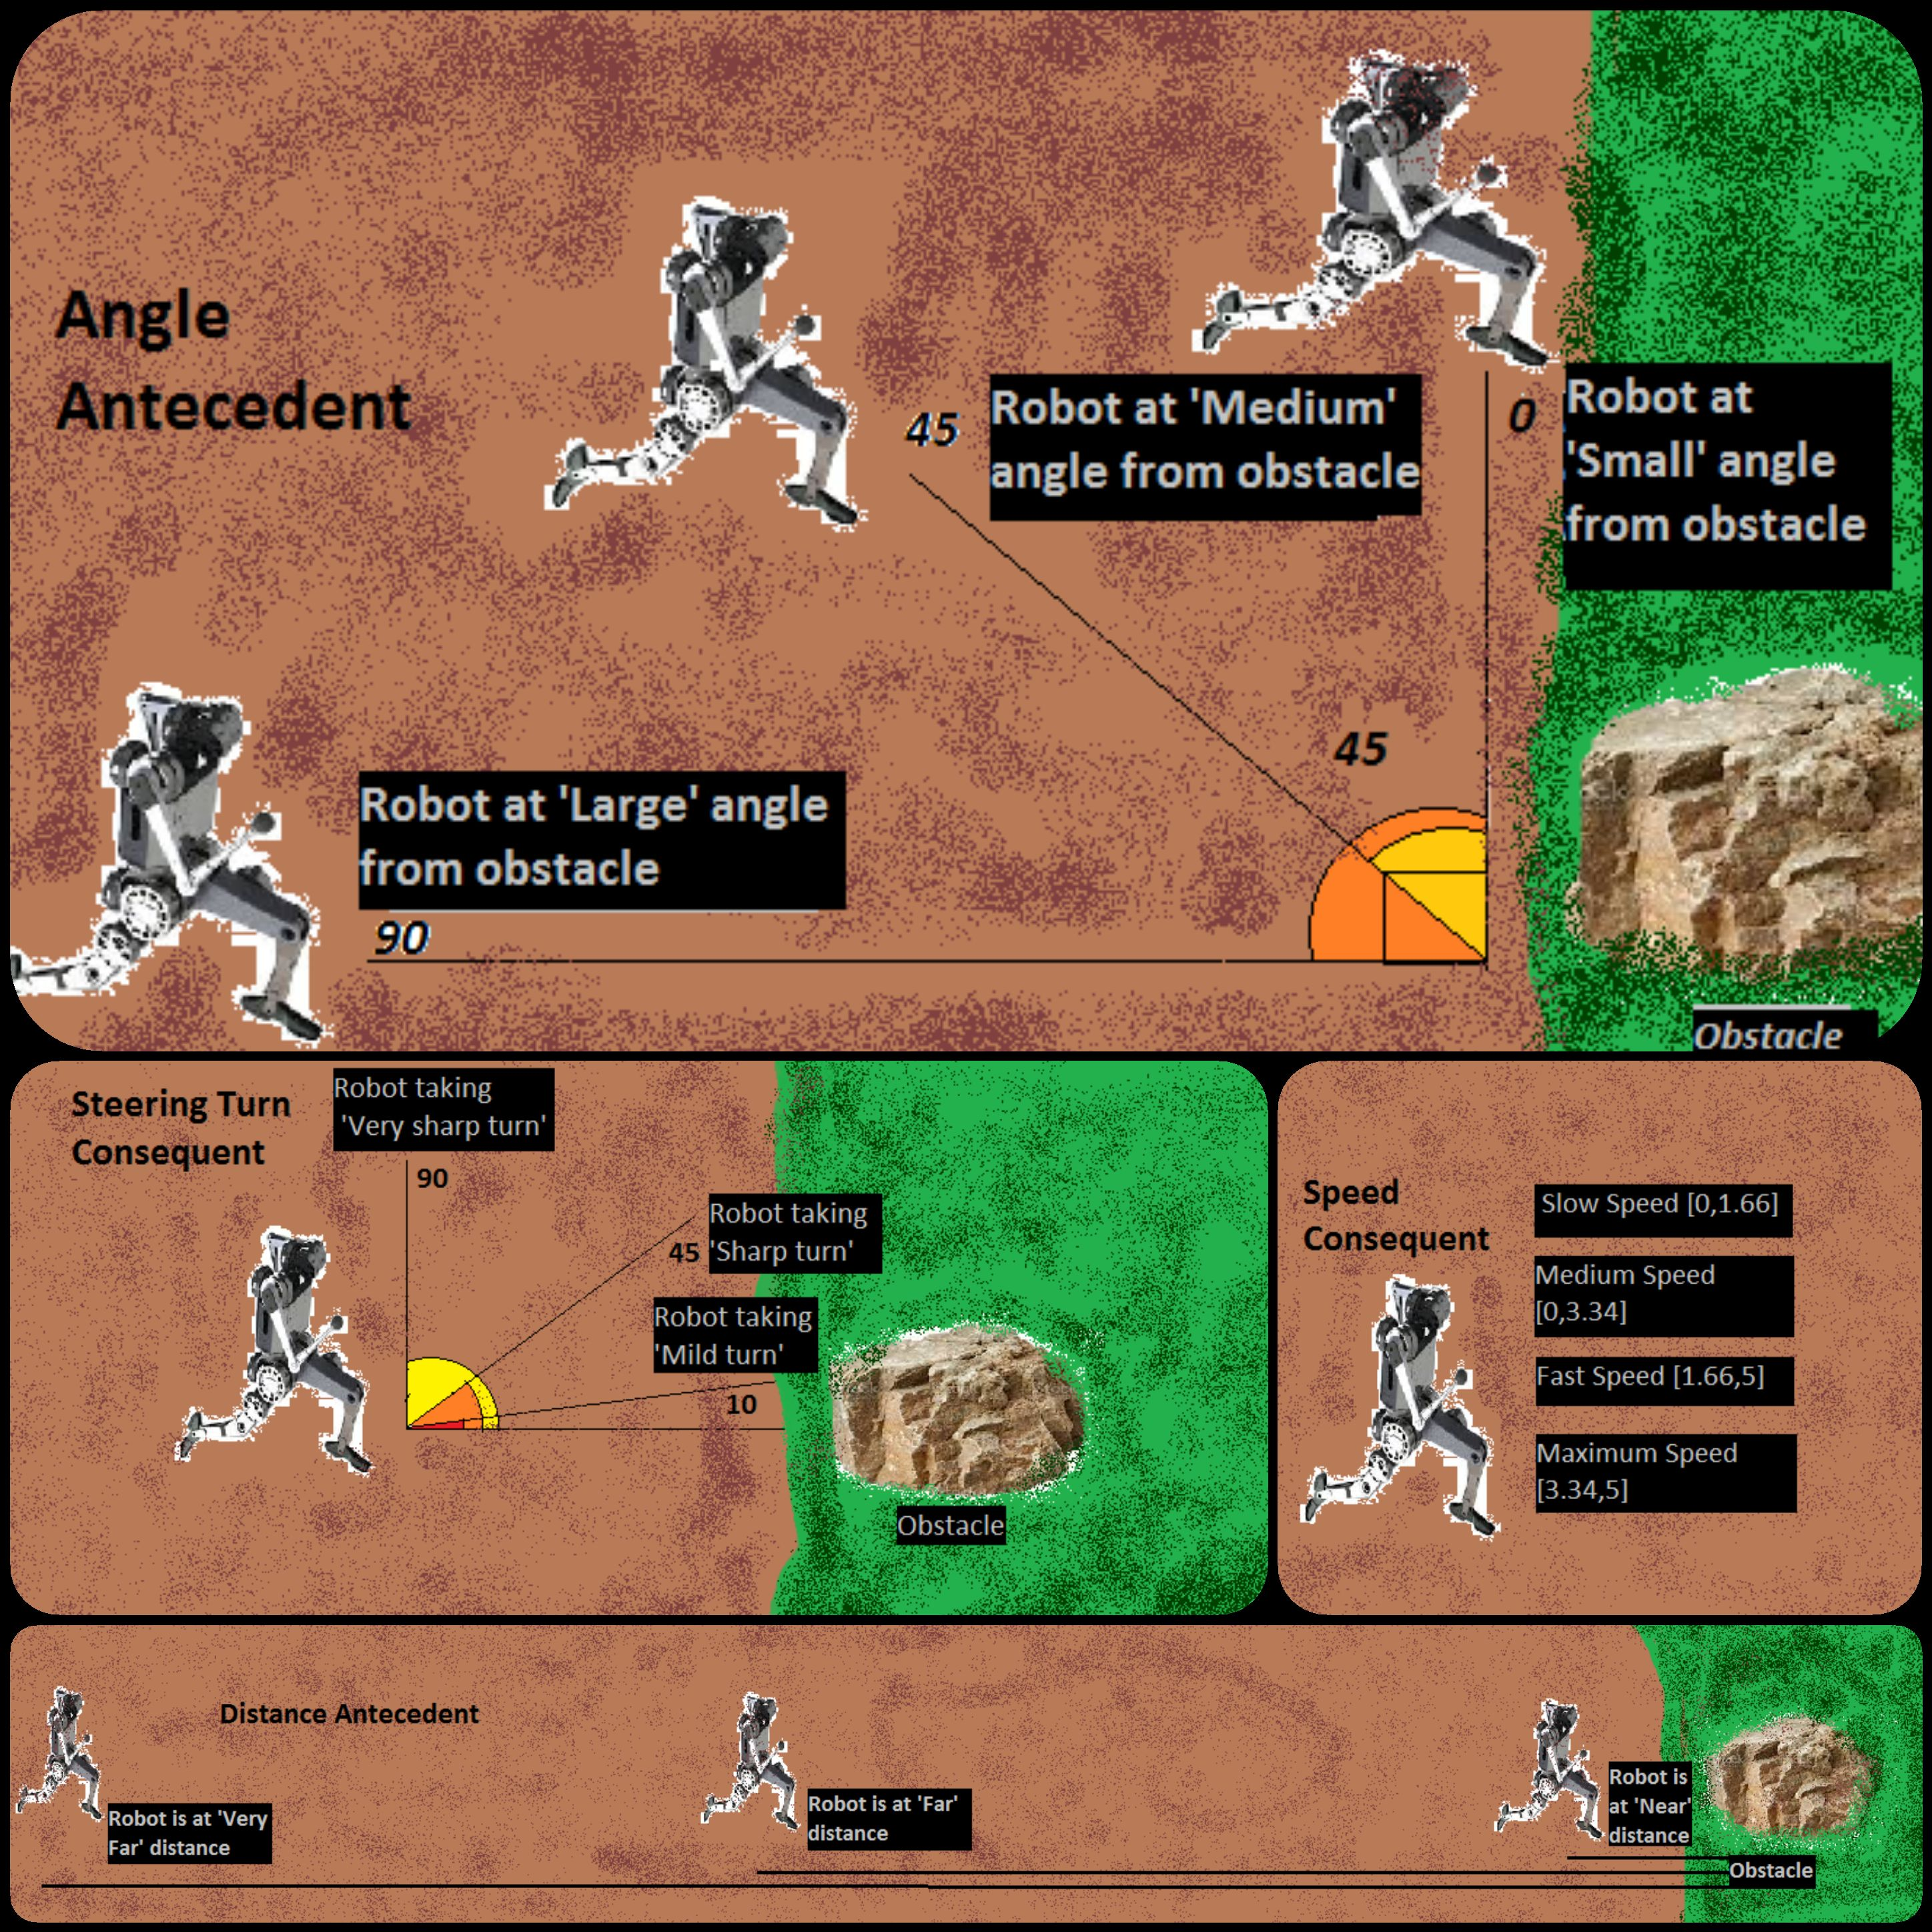

In [7]:
D = ctl.Antecedent(np.arange(0,10.5,0.5),'D')
A = ctl.Antecedent(np.arange(0,91,1),'A')
S = ctl.Consequent(np.arange(0,5.2,0.2),'S')
ST = ctl.Consequent(np.arange(0,91,1),'ST')

### Applying Membership functions:
- Membership functions is used to map Set X or input to a values in range [0,1] .This generated value is called degree of member ship. They are used for graphical representation of fuzzy set, where x-axis defines the universe of particular quantity and y-axis is membership value. There are three types of membership funxtions namely, Triangular, Trapezoidal and Gaussian.
- Firstly, for inputs, the automf is applied to generate Term names for both quantities.
- Then, in Speed and Steering_turn Consequents, the trimf is applied, also known as 'Triangular Membership Function'. This MF has lower limit , upper limit and a value m.
- So, in Speed Control, the universe space is divided into four states where 'SS' ranges between [0,1.66] , 'MS' ranges between [0,1.66] and [1.66,3.34] , 'FS' ranges between [1.66,3.34] and [3.34,5] , and 'MX' ranges within [3.34, 5].
- So, in Steering_turn Control, the universe space is divided into three states where 'MST' ranges between [0,45] , 'SST' ranges between [0,45] and [45,90] , and 'VST' ranges within [45,90].
- Here, the convinient method to divide them according to their states turned out to be Triangular Membership function. As trapezoid membership functions are complex and also, according to space complexity, triangular membership functions are better.

In [8]:
# applying automf for inputs
D.automf(number=3, names=['N','F','VF'])
A.automf(number=3, names=['S','M','L'])

# applying trimf for outputs
S['SS'] = fuzz.trimf(S.universe,[0,0,(5/3)])
S['MS'] = fuzz.trimf(S.universe,[0,(5/3),(10/3)])
S['FS'] = fuzz.trimf(S.universe,[(5/3),(10/3),5])
S['MX'] = fuzz.trimf(S.universe,[(10/3),5,5])
ST['MST'] = fuzz.trimf(ST.universe,[0,0,45])
ST['SST'] = fuzz.trimf(ST.universe,[0,45,90])
ST['VST'] = fuzz.trimf(ST.universe,[45,90,90])

### Visualization of fuzzy sets:

#### Antecedents:

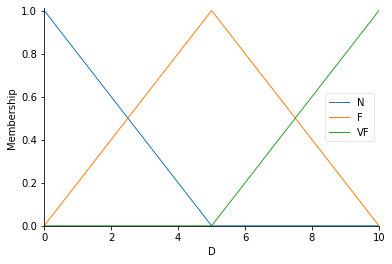

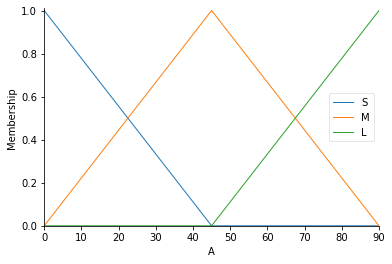

In [9]:
# Input quantities visualization
D.view()
A.view()

#### Consequents:

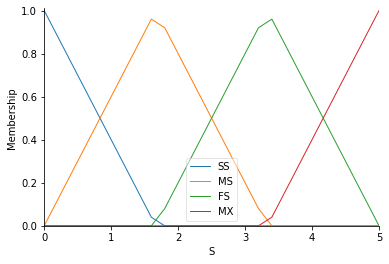

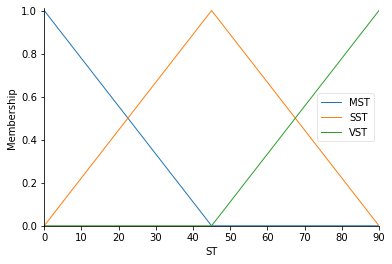

In [10]:
# Output quantities visualization
S.view()
ST.view()

## By hand implementation of Obtaining membership functions:

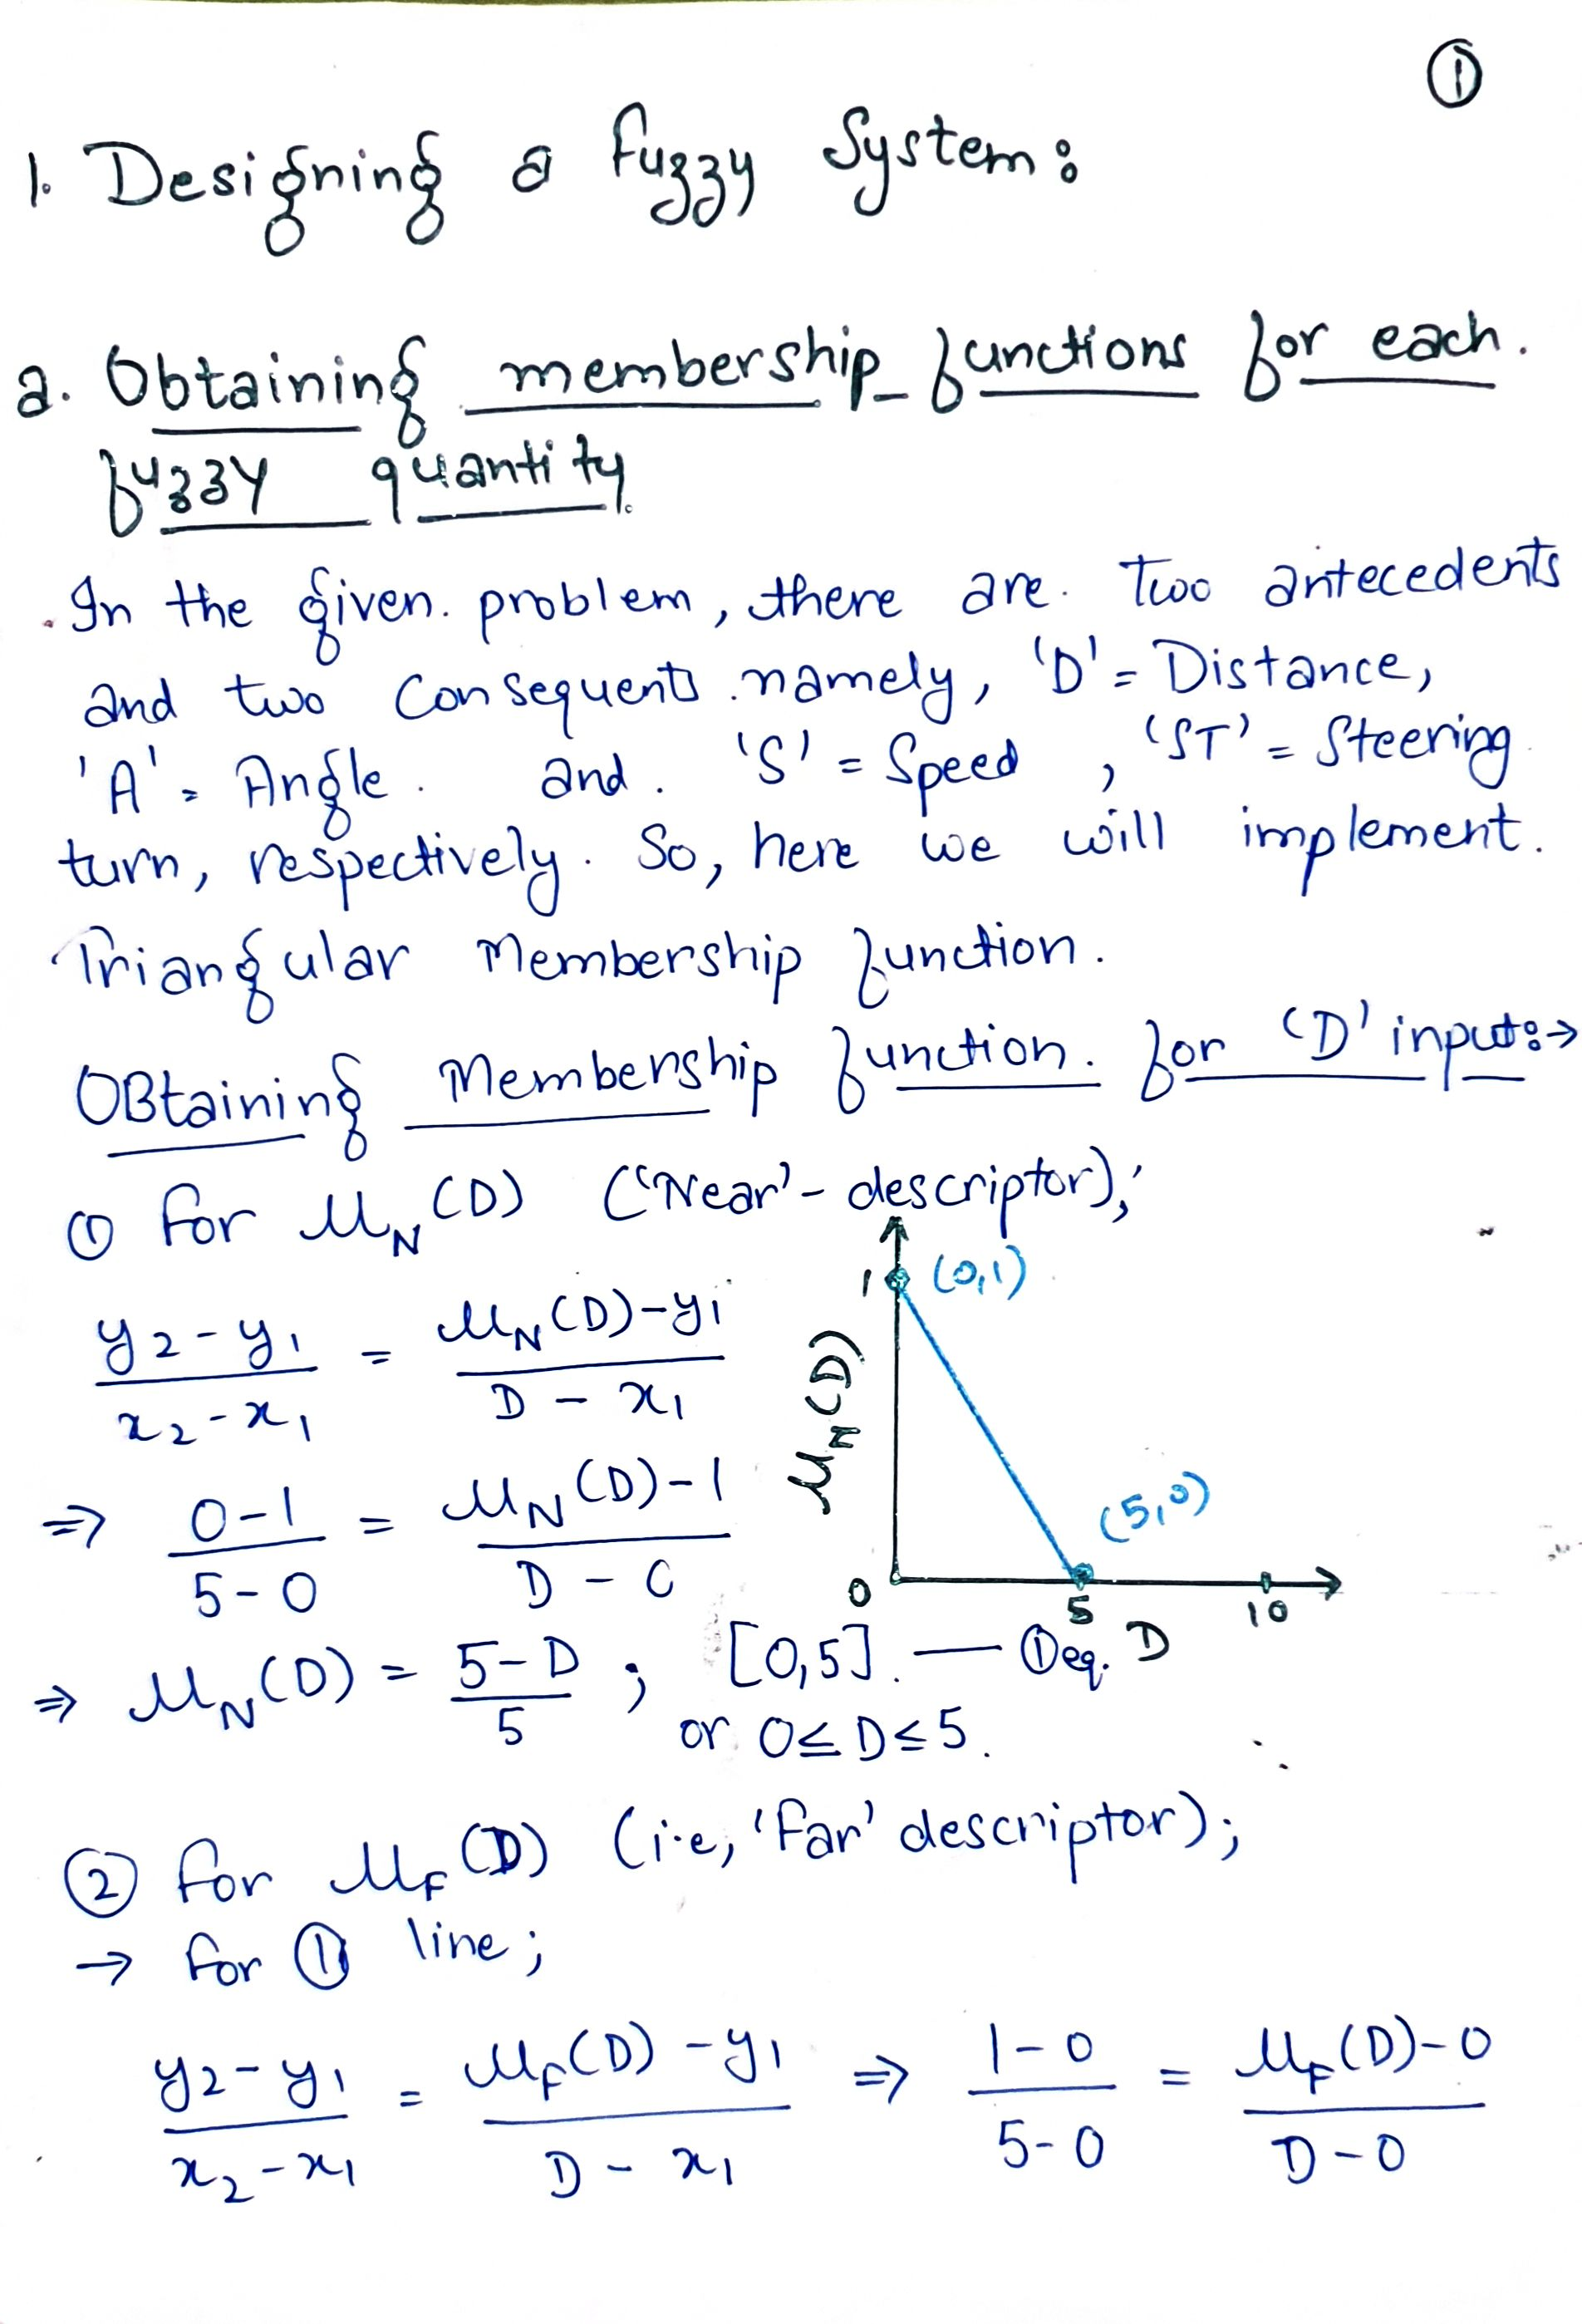
![Document%2026_2.jpg](attachment:Document%2026_2.jpg)
![Document%2026_3.jpg](attachment:Document%2026_3.jpg)
![Document%2026_4.jpg](attachment:Document%2026_4.jpg)
![Document%2026_5.jpg](attachment:Document%2026_5.jpg)
![Document%2026_6.jpg](attachment:Document%2026_6.jpg)
![Document%2026_7.jpg](attachment:Document%2026_7.jpg)
![Document%2026_8.jpg](attachment:Document%2026_8.jpg)
![Document%2026_9.jpg](attachment:Document%2026_9.jpg)

### Implementing Inference System and Defining Rules:
- As, membership functions are already defined thus, now rule base will be created for 'Steering turn' and 'Speed' output.
- In case of Distance input , if the object is near , there is a need to take significant action, whereas if distance is far away , the situation is not that critical and minor change in speed of vehicle and angle of steering turn can avoid collision. Thus, it can be said , less is the distance , more crtical is the situation and there is immediate need of great change in outputs state, or vice-versa .
-  Here, the more is the angle , the more critical the situation will be as , if angle is about 80 or 90 degree, then , collision will definately  happen , but if angle is small , there may chances that the robot will not collide as hard as large angle and may pass by , just touching it. So, large is the angle , critical is the situation which arises immediate need of huge change in outputs , or vice-versa.

## By hand implementation of Fuzzy Rule Base:
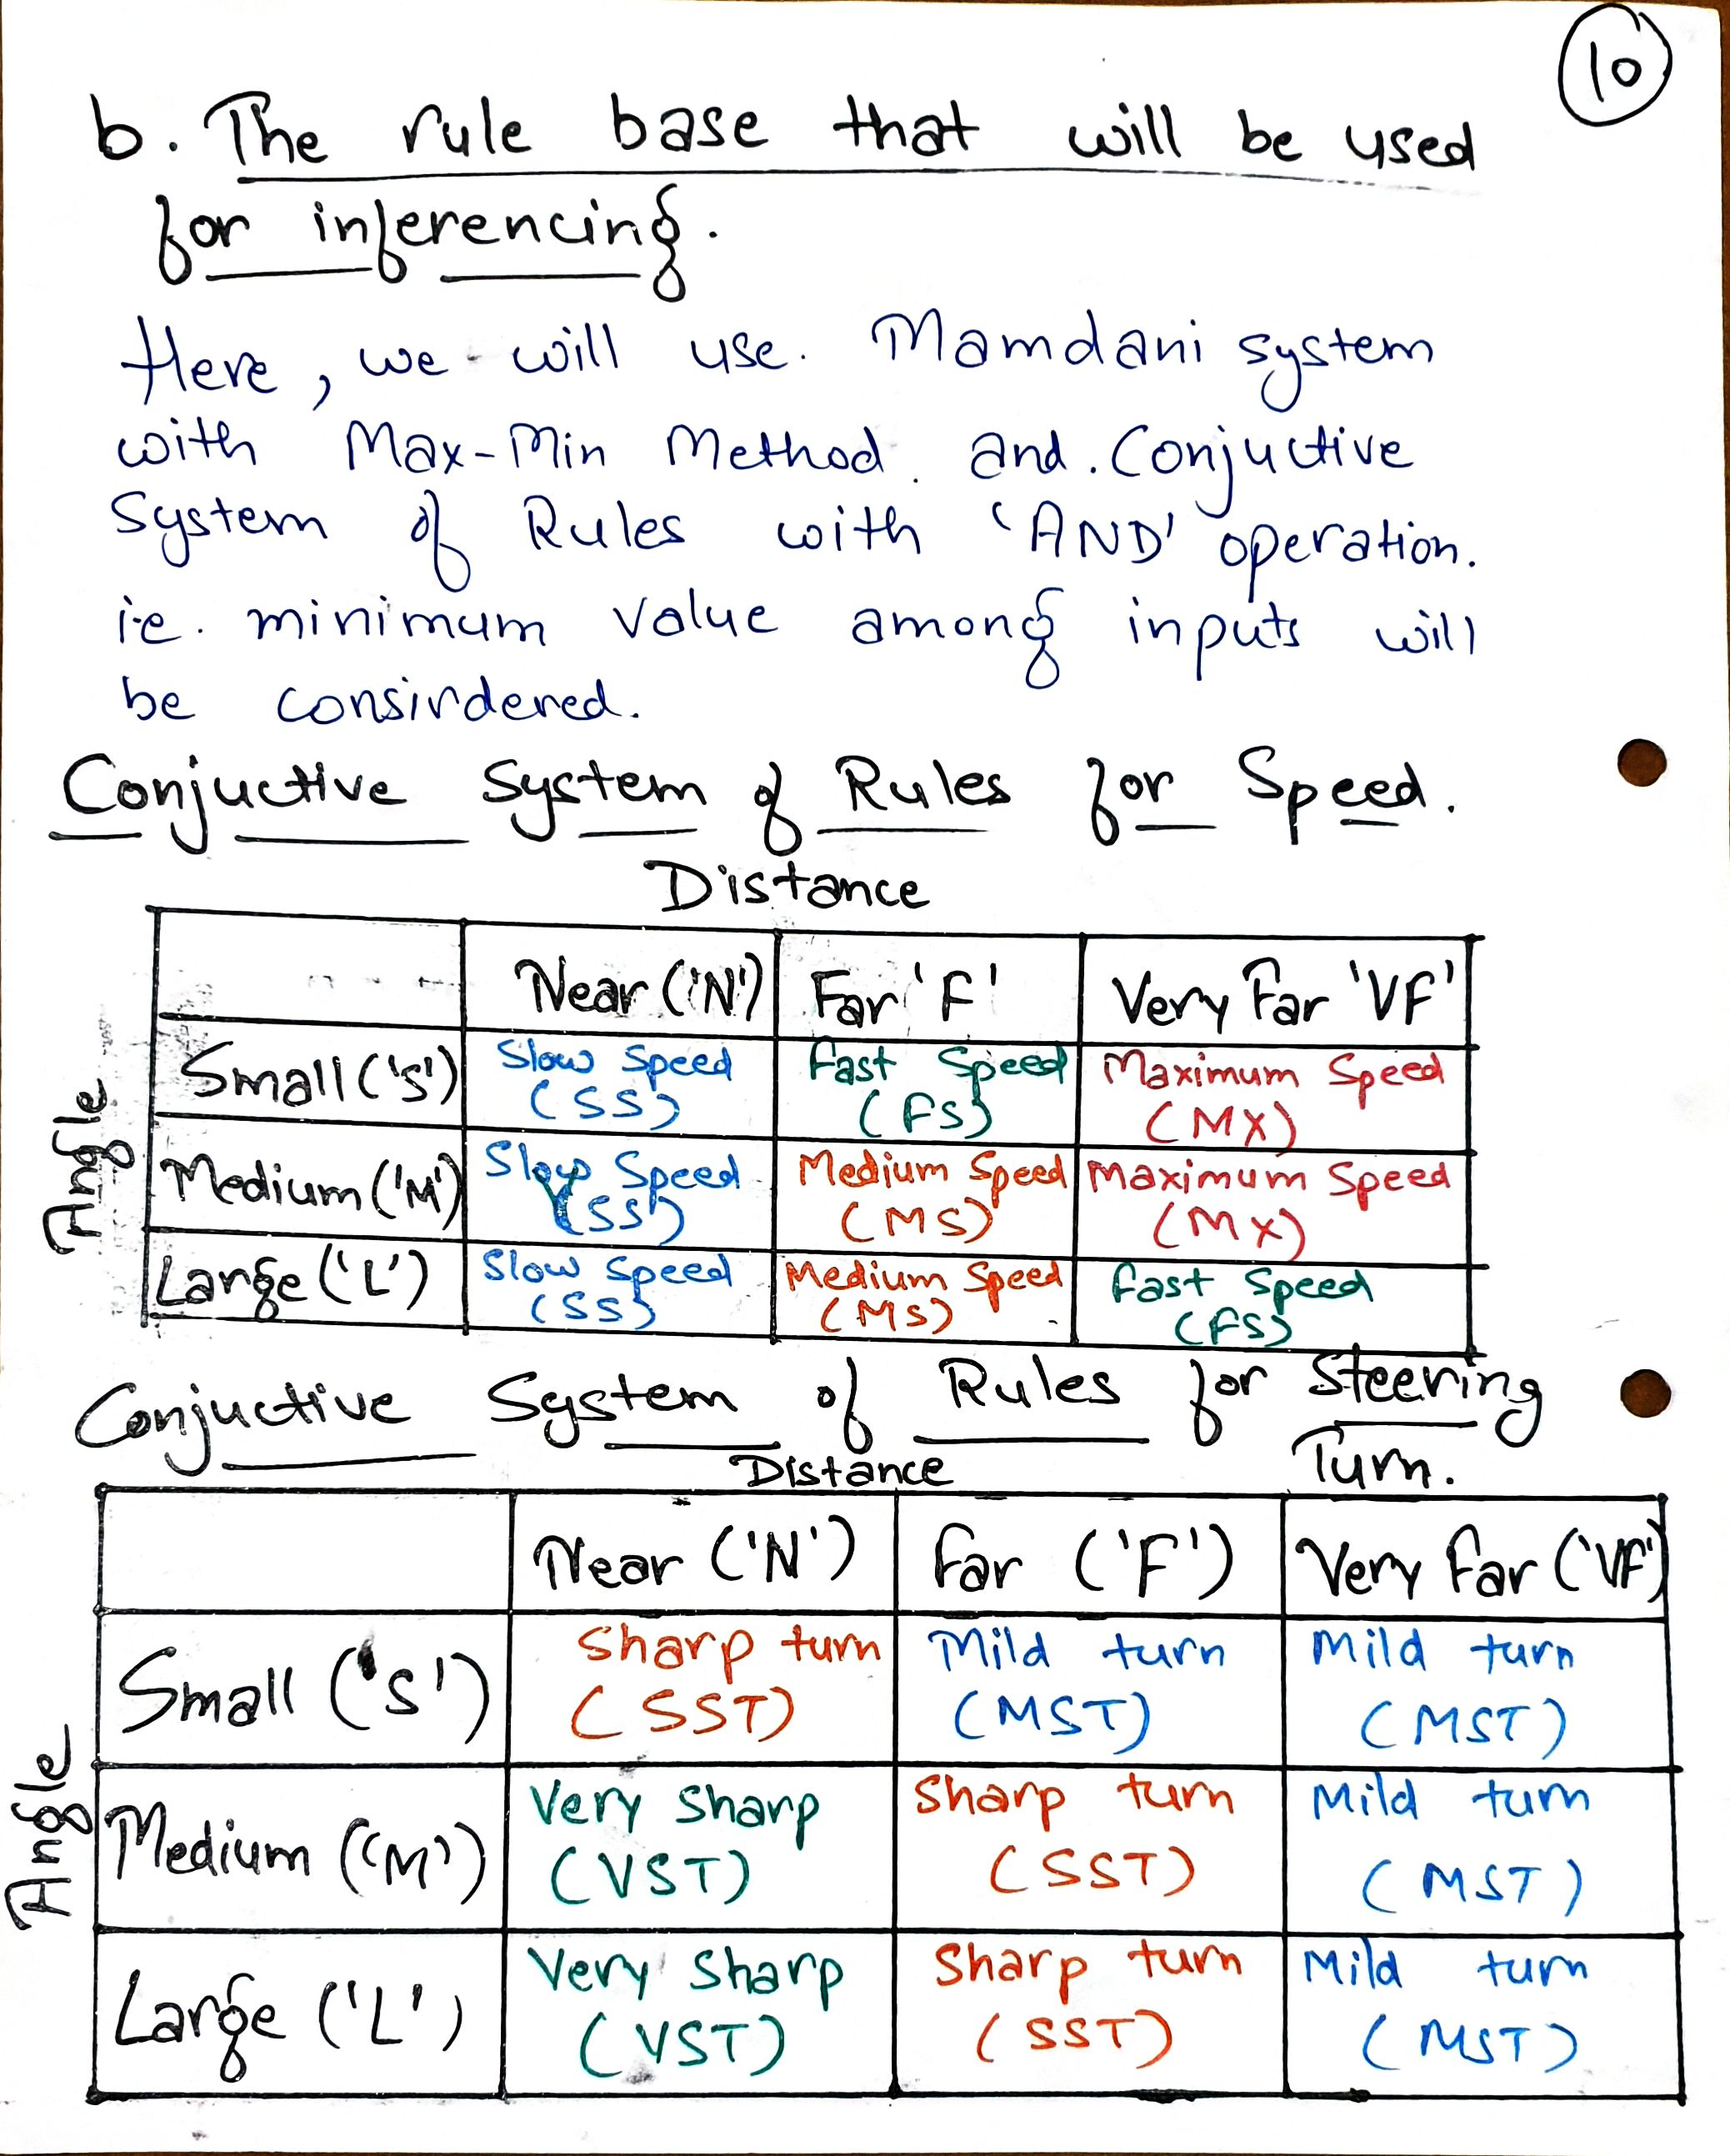

#### for 'Steering Turn':
- Rule 1: If Distance is 'Near' AND Angle is 'Large' , then Steering turn will be 'Very Sharp Turn'.
- Rule 2: If Distance is 'Near' AND Angle is 'Medium' , then Steering turn will be 'Very Sharp Turn'.
- Rule 3: If Distance is 'Near' AND Angle is 'Small' , then Steering turn will be 'Sharp Turn'.
- Rule 4: If Distance is 'Far' AND Angle is 'Large' , then Steering turn will be 'Sharp Turn'.
- Rule 5: If Distance is 'Far' AND Angle is 'Medium' , then Steering turn will be 'Sharp Turn'.
- Rule 6: If Distance is 'Far' AND Angle is 'Small' , then Steering turn will be 'Mild Turn'.
- Rule 7: If Distance is 'Very Far' AND Angle is 'Large' , then Steering turn will be 'Mild Turn'.
- Rule 8: If Distance is 'Very Far' AND Angle is 'Medium' , then Steering turn will be 'Mild Turn'.
- Rule 9: If Distance is 'Very Far' AND Angle is 'Small' , then Steering turn will be 'Mild Turn'.

##### Also, If maximum Distance =10 and minimum angle = 0 is given , then it will take it as that noi obstacle is detected,thus , there will be no change in Steering turn angle.. Else, in all other conditions, obstacle is detected.

In [11]:
# Function that returns the output of Fuzzy system for 'ST' Consequent
def Inference_system_turn(ST,d,a):
    Rule1_turn = ctl.Rule(D['N'] & A['L'], ST['VST'])
    Rule2_turn = ctl.Rule(D['N'] & A['M'], ST['VST'])
    Rule3_turn = ctl.Rule(D['N'] & A['S'], ST['SST'])
    Rule4_turn = ctl.Rule(D['F'] & A['L'], ST['SST'])
    Rule5_turn = ctl.Rule(D['F'] & A['M'], ST['SST'])
    Rule6_turn = ctl.Rule(D['F'] & A['S'], ST['MST'])
    Rule7_turn = ctl.Rule(D['VF'] & A['L'], ST['MST'])
    Rule8_turn = ctl.Rule(D['VF'] & A['M'], ST['MST'])
    Rule9_turn = ctl.Rule(D['VF'] & A['S'], ST['MST'])

    base_turn = ctl.ControlSystem([Rule1_turn,Rule2_turn,Rule3_turn,Rule4_turn,
                                   Rule5_turn,Rule6_turn,Rule7_turn,Rule8_turn,Rule9_turn])
    system_turn = ctl.ControlSystemSimulation(base_turn)

    system_turn.input['D'] = d
    system_turn.input['A'] = a
    system_turn.compute()
    Turn_output=system_turn.output['ST']
    
    # Displaying the computed output
    print('The computed steering turn is: {}'.format(Turn_output))
    ST.view(sim = system_turn)
    
    return Turn_output

#### for 'Speed':
- Rule 1: If Distance is 'Near' AND Angle is 'Large' , then Speed will be 'Slow'.
- Rule 2: If Distance is 'Near' AND Angle is 'Medium' , then Speed will be 'Slow'.
- Rule 3: If Distance is 'Near' AND Angle is 'Small' , then Speed will be 'Slow'.
- Rule 4: If Distance is 'Far' AND Angle is 'Large' , then Speed will be 'Medium'.
- Rule 5: If Distance is 'Far' AND Angle is 'Medium' , then Speed will be 'Medium'.
- Rule 6: If Distance is 'Far' AND Angle is 'Small' , then Speed will be 'Fast'.
- Rule 7: If Distance is 'Very Far' AND Angle is 'Large' , then Speed will be 'Fast'.
- Rule 8: If Distance is 'Very Far' AND Angle is 'Medium' , then Speed will be 'Maximum'.
- Rule 9: If Distance is 'Very Far' AND Angle is 'Small' , then Speed will be 'Maximum'.

##### Also, If maximum Distance =10 and minimum angle = 0 is given , then it will take it as that no obstacle is detected,thus , Speed can be increased upto 'Maximum'. Else, in all other conditions, obstacle is detected.

In [12]:
# Function that returns the output of Fuzzy system for 'S' Consequent
def Inference_system_S(S,d,a):
    Rule1_S = ctl.Rule(D['N'] & A['L'], S['SS'])
    Rule2_S = ctl.Rule(D['N'] & A['M'], S['SS'])
    Rule3_S = ctl.Rule(D['N'] & A['S'], S['SS'])
    Rule4_S = ctl.Rule(D['F'] & A['L'], S['MS'])
    Rule5_S = ctl.Rule(D['F'] & A['M'], S['MS'])
    Rule6_S = ctl.Rule(D['F'] & A['S'], S['FS'])
    Rule7_S = ctl.Rule(D['VF'] & A['L'], S['FS'])
    Rule8_S = ctl.Rule(D['VF'] & A['M'], S['MX'])
    Rule9_S = ctl.Rule(D['VF'] & A['S'], S['MX'])
    

    base_S = ctl.ControlSystem([Rule1_S,Rule2_S,Rule3_S,Rule4_S,Rule5_S,Rule6_S,Rule7_S,Rule8_S,Rule9_S])
    system_S = ctl.ControlSystemSimulation(base_S)

    system_S.input['D'] = d
    system_S.input['A'] = a
    system_S.compute()
    S_output=system_S.output['S']
    
    # Displaying the computed output
    print('The computed S is: {}'.format(S_output))
    S.view(sim = system_S)
    
    return S_output

# Part 2)

### The Used Inferencing System - Mamdani:
- The used Inference system is Mamdani in above implementation and is suitable for Decision Support applications. 
- The main distinguishable factor among them is that Mamdani use defuzzification for crisp outputs whereas , the Sugeno uses the weighted average to compute crisp output. 
- Apart from this, Mamdani has output membership functions whereas Sugeno has no output memership functions. In our problem, output membership function place an important role for decision making.
- Due to more human-like , intutive nature, expressive power and interpretibility, Mamdani is widely used and better.
- Also, Sugeno system returns the output as the function of input x and y, which is not suitable for given problem.Thus, Mamdani metthod is implemented here.

## Implementation of Different Defuzzification methods:

### Defuzzification method: 'centroid'

In [13]:
# Change defuzzification method to centroid
S.defuzzify_method = 'centroid'
ST.defuzzify_method ='centroid'

#### For  input where object is detected:

The computed S is: 1.3777561397814566
The computed steering turn is: 52.902439024390226


52.902439024390226

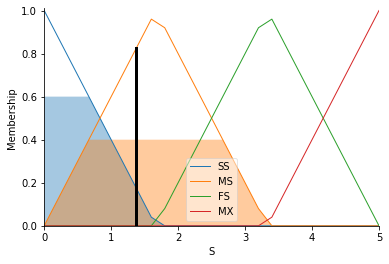

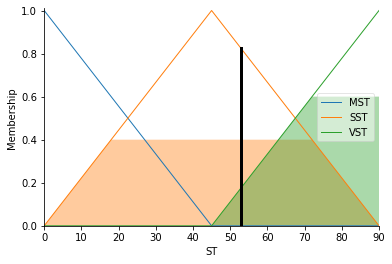

In [14]:
# Calling the functions
Inference_system_S(S,2,80)
Inference_system_turn(ST,2,80)

#### For  input where object is not detected:

The computed S is: 4.440829346092504
The computed steering turn is: 14.999999999999991


14.999999999999991

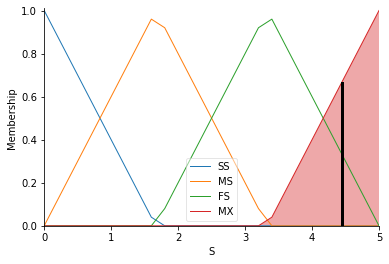

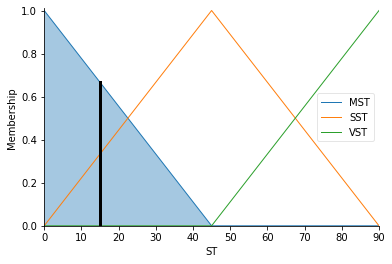

In [15]:
Inference_system_S(S,10,0)
Inference_system_turn(ST,10,0)

### Defuzzification method: 'bisector'

In [16]:
# Change defuzzification method to bisector
S.defuzzify_method = 'bisector'
ST.defuzzify_method ='bisector'

#### For  input where object is detected:

The computed S is: 1.2949999999999997
The computed steering turn is: 55.125000000000014


55.125000000000014

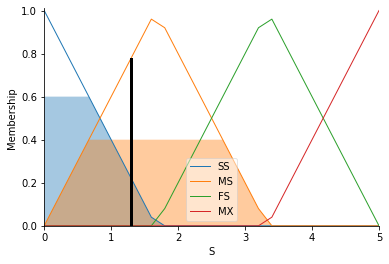

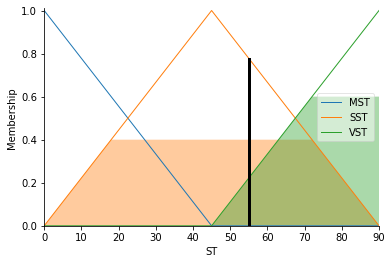

In [17]:
# calling the functions
Inference_system_S(S,2,80)
Inference_system_turn(ST,2,80)

#### For  input where object is not detected:

The computed S is: 4.509957506314853
The computed steering turn is: 13.180194846605374


13.180194846605374

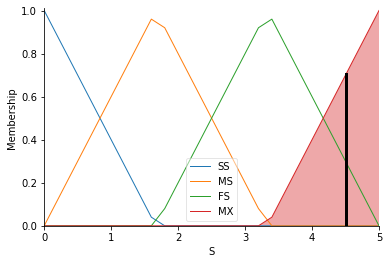

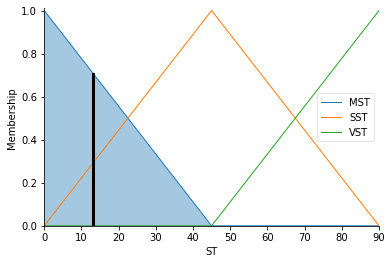

In [18]:
# calling the functions
Inference_system_S(S,10,0)
Inference_system_turn(ST,10,0)

### Defuzzification method: 'som'

In [19]:
# Change defuzzification method to som
S.defuzzify_method = 'som'
ST.defuzzify_method ='som'

#### For  input where object is detected:

The computed S is: 0.0
The computed steering turn is: 72.0


72.0

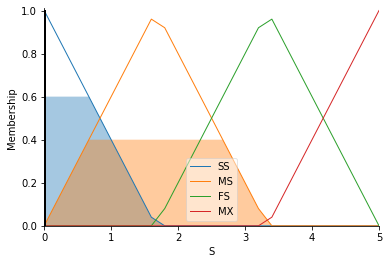

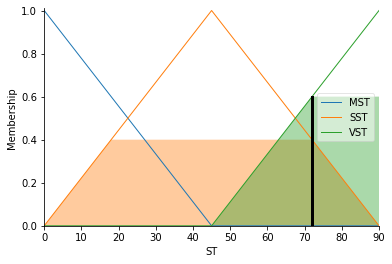

In [20]:
# Calling the functions
Inference_system_S(S,2,80)
Inference_system_turn(ST,2,80)

#### For  input where object is not detected:

The computed S is: 5.0
The computed steering turn is: 0.0


0.0

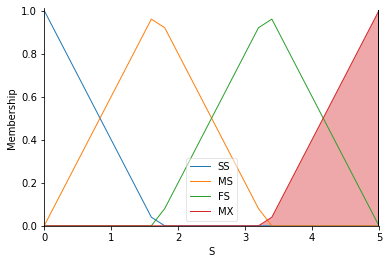

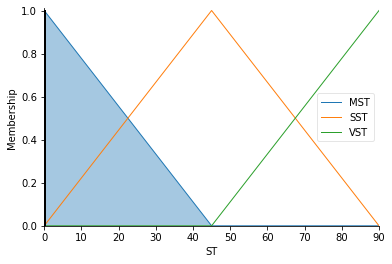

In [21]:
# Calling the functions
Inference_system_S(S,10,0)
Inference_system_turn(ST,10,0)

### Defuzzification method: 'lom'

In [22]:
# Change defuzzification method to lom
S.defuzzify_method = 'lom'
ST.defuzzify_method ='lom'

#### For  input where object is detected:

The computed S is: 0.6666666666666667
The computed steering turn is: 90.0


90.0

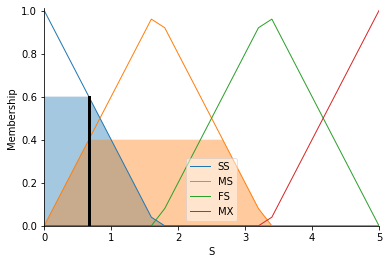

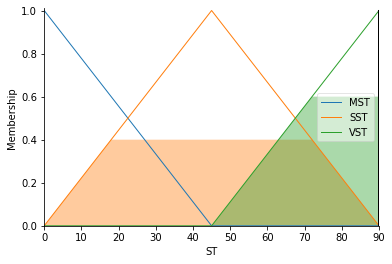

In [23]:

# calling the functions
Inference_system_S(S,2,80)
Inference_system_turn(ST,2,80)

#### For input where object is not detected:

The computed S is: 5.0
The computed steering turn is: 0.0


0.0

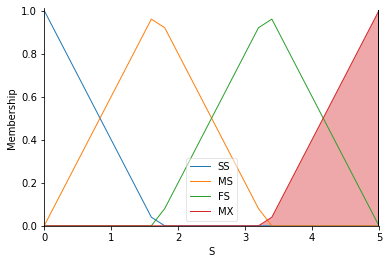

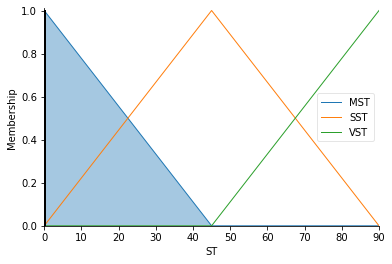

In [24]:
# calling the functions
Inference_system_S(S,10,0)
Inference_system_turn(ST,10,0)

### Defuzzification method: 'mom'

In [25]:
# Change defuzzification method to mom
S.defuzzify_method = 'mom'
ST.defuzzify_method ='mom'

#### For 1) input where object is detected:

The computed S is: 1.750617283950617
The computed steering turn is: 45.0


45.0

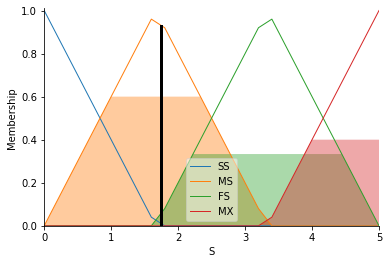

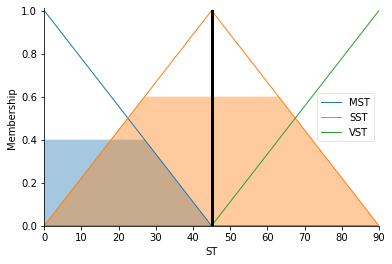

In [26]:
# calling the functions
Inference_system_S(S,7,60)
Inference_system_turn(ST,7,60)

#### For 2) input where object is detected:

The computed S is: 0.3733333333333334
The computed steering turn is: 81.0


81.0

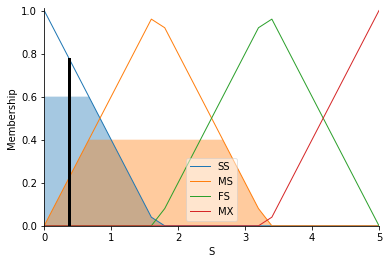

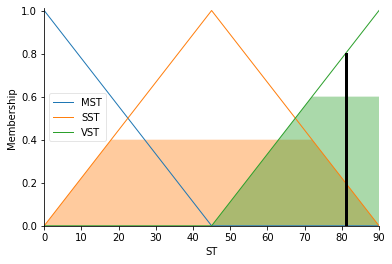

In [27]:
# calling the functions
Inference_system_S(S,2,80)
Inference_system_turn(ST,2,80)

#### For input where object is not detected:

The computed S is: 5.0
The computed steering turn is: 0.0


0.0

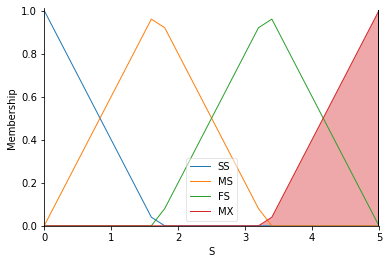

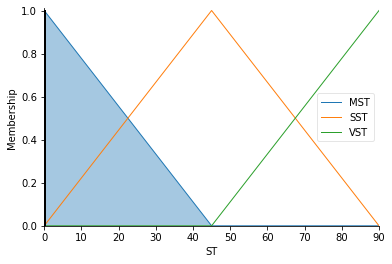

In [28]:
# Calling the functions
Inference_system_S(S,10,0)
Inference_system_turn(ST,10,0)

### Comparisions between Defuzzification methods:
- Here, the default method for defuzzification is 'centroid' and default Inferencing system is 'Mamdani'.
- Centroid : It resturns center of gravity of fuzzy set as the crisp output.
- Bisector : It returns the value of verticle line that divides the fuzzy set area into two equals.
- MOM , SOM, LOM : It returns the middle, smallest and largest of maximum value. If aggregate function has unique maximum, then they will return the same output.
- In our case, When object is detected , then bisector and Centroid both provided good results and so did MOM .
- But, when object is not detected , then bisector and centroid method still shows change in steering angle and even , speed is not cruised to maximum.
- Also, SOM and LOM are giving desired results when no obstacle is detected but, in other other case when obstacle is near, it reduces the speed upto 0 in SOM and in LOM it takes the maximum of very sharp turn, which is not good. so, these both methods will also be discarded.
- Thus, for defuzzification method, MOM  will be used .

## By hand implementation of Mamdani In ference system and Defuzzification strategy with two examples:
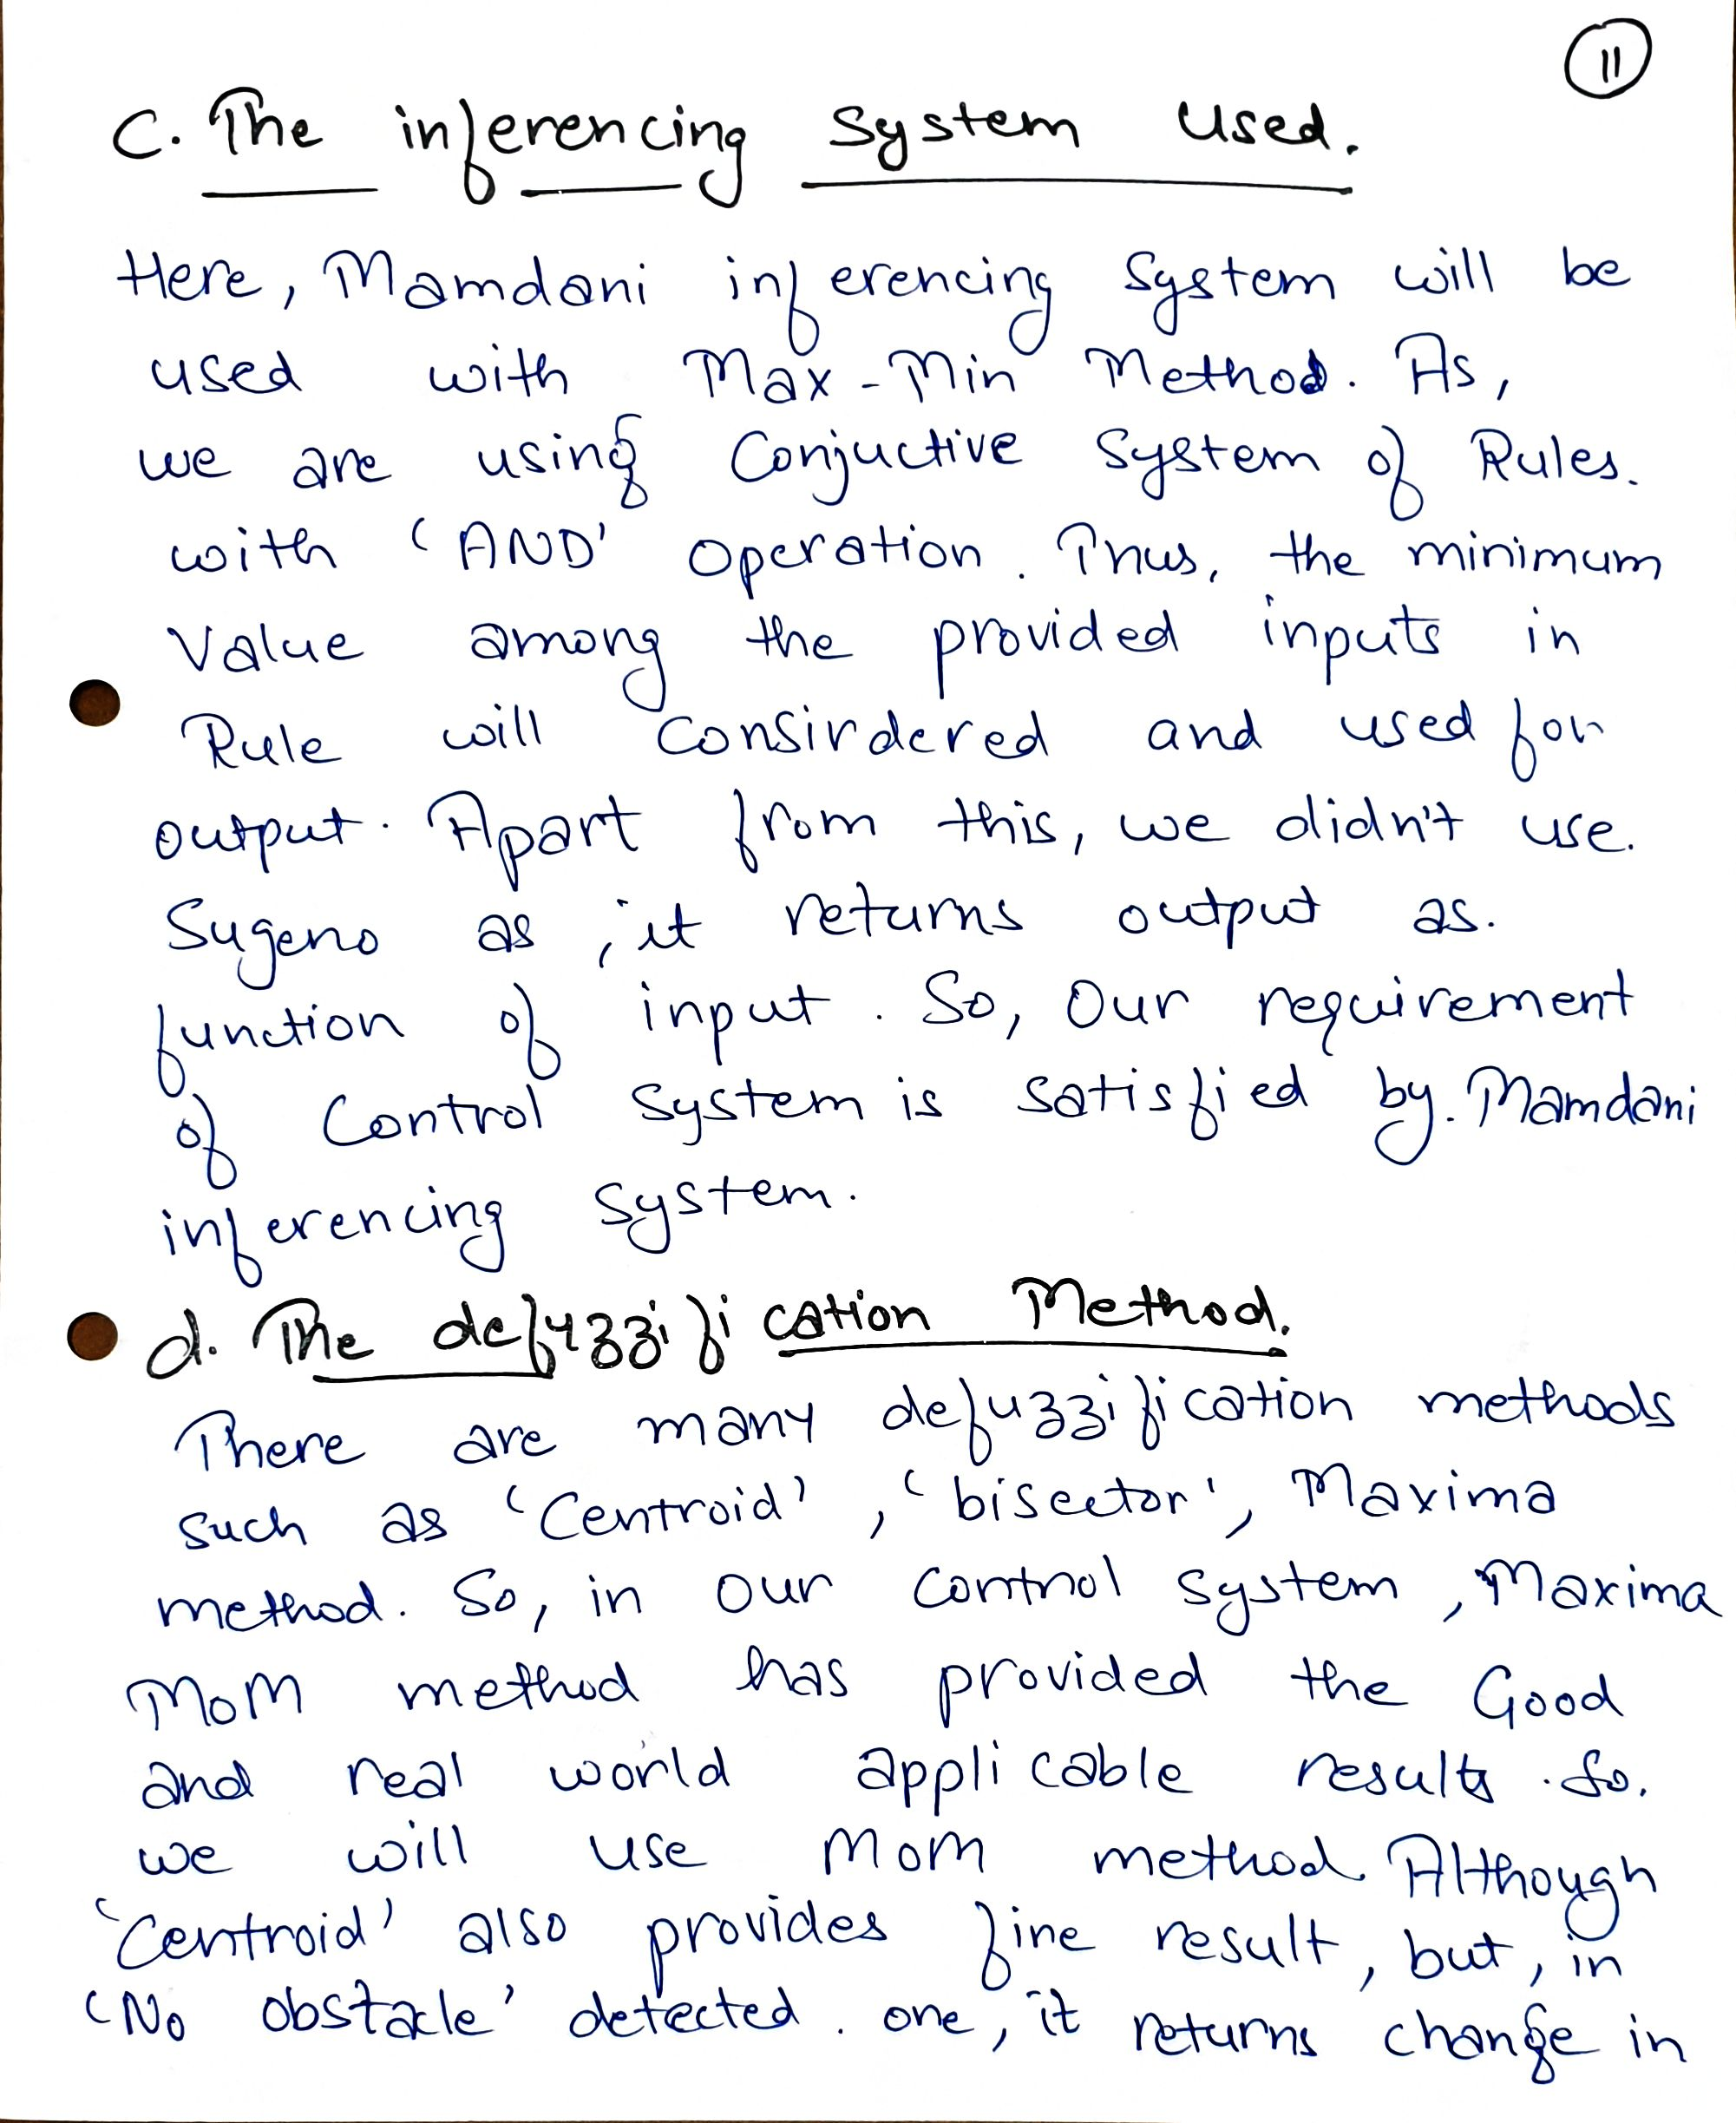
![Document%2026_12.jpg](attachment:Document%2026_12.jpg)
![Document%2026_13.jpg](attachment:Document%2026_13.jpg)
![Document%2026_14.jpg](attachment:Document%2026_14.jpg)
![Document%2026_15.jpg](attachment:Document%2026_15.jpg)

# Part 3)

### Using 2 inputs with MOM Defuzzification method( Where obstacle is detected):

- First, the input is used as distance = 7 and angle = 60 , which provides the result of 1.75 in case of Speed and 45 in case of Steering turn.
- Then, another input is used where distance = 2 and angle = 80 , which provides the result of 0.37 in case of Speed and 81 in case of Steering turn.
- Thus, here we provided a normal input and the input where there are more chances of collision . The implementation also reveals how different defuzzification methods and choice of inference system reacted to the provided situation.

### Using  input with MOM Defuzzification method( Where obstacle is not detected):

Here, maximum distance is taken and minimum angle is given as input which is 10 and 0 respectively.
On applying MOM, its returns no change that is 0 in Steering turn angle and speed as maximum that is 5.
So, when no obstacle will be detected, then, steering turn angle will not change and speed will be increased.